In [68]:
import json
import os

In [69]:
annot_path_real = 'data\\real_train_autonumber_annotations.json'
annot_path_syn = 'data\\syn_train_autonumber_annotations.json'

In [70]:
with open(annot_path_syn) as f:
    annotation_list_syn = json.load(f)
with open(annot_path_real) as f:
    annotation_list_real = json.load(f)

In [71]:
annotation_list_syn

[{'annotation': [{'class': 'rect',
    'width': 81,
    'height': 50,
    'x': 418.5,
    'y': 268.0,
    'number': 'H494AK37'},
   {'class': 'rect',
    'width': 89,
    'height': 69,
    'x': 495.5,
    'y': 565.5,
    'number': 'O933AB47'},
   {'class': 'rect',
    'width': 68,
    'height': 45,
    'x': 440.0,
    'y': 296.5,
    'number': 'H724KC30'},
   {'class': 'rect',
    'width': 103,
    'height': 56,
    'x': 377.5,
    'y': 244.0,
    'number': 'K692KK96'}],
  'class': 'image',
  'filename': 'data\\train_synthetic\\image_0_0.JPG'},
 {'annotation': [{'class': 'rect',
    'width': 102,
    'height': 65,
    'x': 529.0,
    'y': 579.5,
    'number': 'K893XK95'},
   {'class': 'rect',
    'width': 65,
    'height': 46,
    'x': 578.5,
    'y': 342.0,
    'number': 'H336XT43'},
   {'class': 'rect',
    'width': 71,
    'height': 62,
    'x': 757.5,
    'y': 568.0,
    'number': 'C969AB5'}],
  'class': 'image',
  'filename': 'data\\train_synthetic\\image_0_1.JPG'},
 {'annotation'

In [72]:
annotation_list = annotation_list_syn.copy()
for el in annotation_list_real:
#     print(el['annotation'])
    el['annotation']['x'] = el['annotation']['x']+el['annotation']['width']/2
    el['annotation']['y'] = el['annotation']['y']+el['annotation']['height']/2
    el['annotation'] = [el['annotation']]
    el['filename'] = el['filename'].replace('xml', 'JPG')
    annotation_list.append(el)

annotation_list[-1]

{'annotation': [{'class': 'rect',
   'width': 62.0,
   'height': 47.0,
   'x': 82.0,
   'y': 426.5,
   'number': 'Y592HY96'}],
 'class': 'image',
 'filename': 'data\\train_notations\\Y592HY-96.JPG'}

In [73]:
len(annotation_list)

10927

In [74]:
N=0
images = []
categories = [{
              "supercategory": "none",
              "name": "number",
              "id": 1
            }]
annotations = []
for i, el in enumerate(annotation_list):
    images.append({
                  "file_name": (el['filename']).split('\\')[-1],
                  "height": 750,
                  "width": 1200,
                  "id": i+1
                    })
    for j, annot in enumerate(el['annotation']):
        annotations.append({  "id": (j+1)+i*10,
                              "bbox": [
                                annot['x']-annot['width']/2,
                                annot['y']-annot['height']/2,
                                annot['width'],
                                annot['height']
                              ],
                              "image_id": i+1,
                              "segmentation": [],
                              "ignore": 0,
                              "area": annot['width']*annot['height'],
                              "iscrowd": 0,
                              "category_id": 1})


coco_dict = {
              "type": "instances",
              "images": images,
              "categories": categories,
              "annotations": annotations
            }

In [75]:
coco_dict

{'type': 'instances',
 'images': [{'file_name': 'image_0_0.JPG',
   'height': 750,
   'width': 1200,
   'id': 1},
  {'file_name': 'image_0_1.JPG', 'height': 750, 'width': 1200, 'id': 2},
  {'file_name': 'image_0_2.JPG', 'height': 750, 'width': 1200, 'id': 3},
  {'file_name': 'image_0_3.JPG', 'height': 750, 'width': 1200, 'id': 4},
  {'file_name': 'image_0_4.JPG', 'height': 750, 'width': 1200, 'id': 5},
  {'file_name': 'image_0_5.JPG', 'height': 750, 'width': 1200, 'id': 6},
  {'file_name': 'image_0_6.JPG', 'height': 750, 'width': 1200, 'id': 7},
  {'file_name': 'image_0_7.JPG', 'height': 750, 'width': 1200, 'id': 8},
  {'file_name': 'image_0_8.JPG', 'height': 750, 'width': 1200, 'id': 9},
  {'file_name': 'image_0_9.JPG', 'height': 750, 'width': 1200, 'id': 10},
  {'file_name': 'image_0_10.JPG', 'height': 750, 'width': 1200, 'id': 11},
  {'file_name': 'image_0_11.JPG', 'height': 750, 'width': 1200, 'id': 12},
  {'file_name': 'image_0_12.JPG', 'height': 750, 'width': 1200, 'id': 13},
  {

In [76]:
coco_dict['images'][-1]

{'file_name': 'Y592HY-96.JPG', 'height': 750, 'width': 1200, 'id': 10927}

In [77]:
coco_dict['annotations'][-1]

{'id': 109261,
 'bbox': [51.0, 403.0, 62.0, 47.0],
 'image_id': 10927,
 'segmentation': [],
 'ignore': 0,
 'area': 2914.0,
 'iscrowd': 0,
 'category_id': 1}

In [78]:
with open(os.path.join('data', 'coco_train_autonumber_annotations.json'), "w", encoding="utf-8") as file:
    json.dump(coco_dict, file)

In [79]:
import cv2
import os 
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
def visualize(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(40, 20))
    plt.imshow(image)

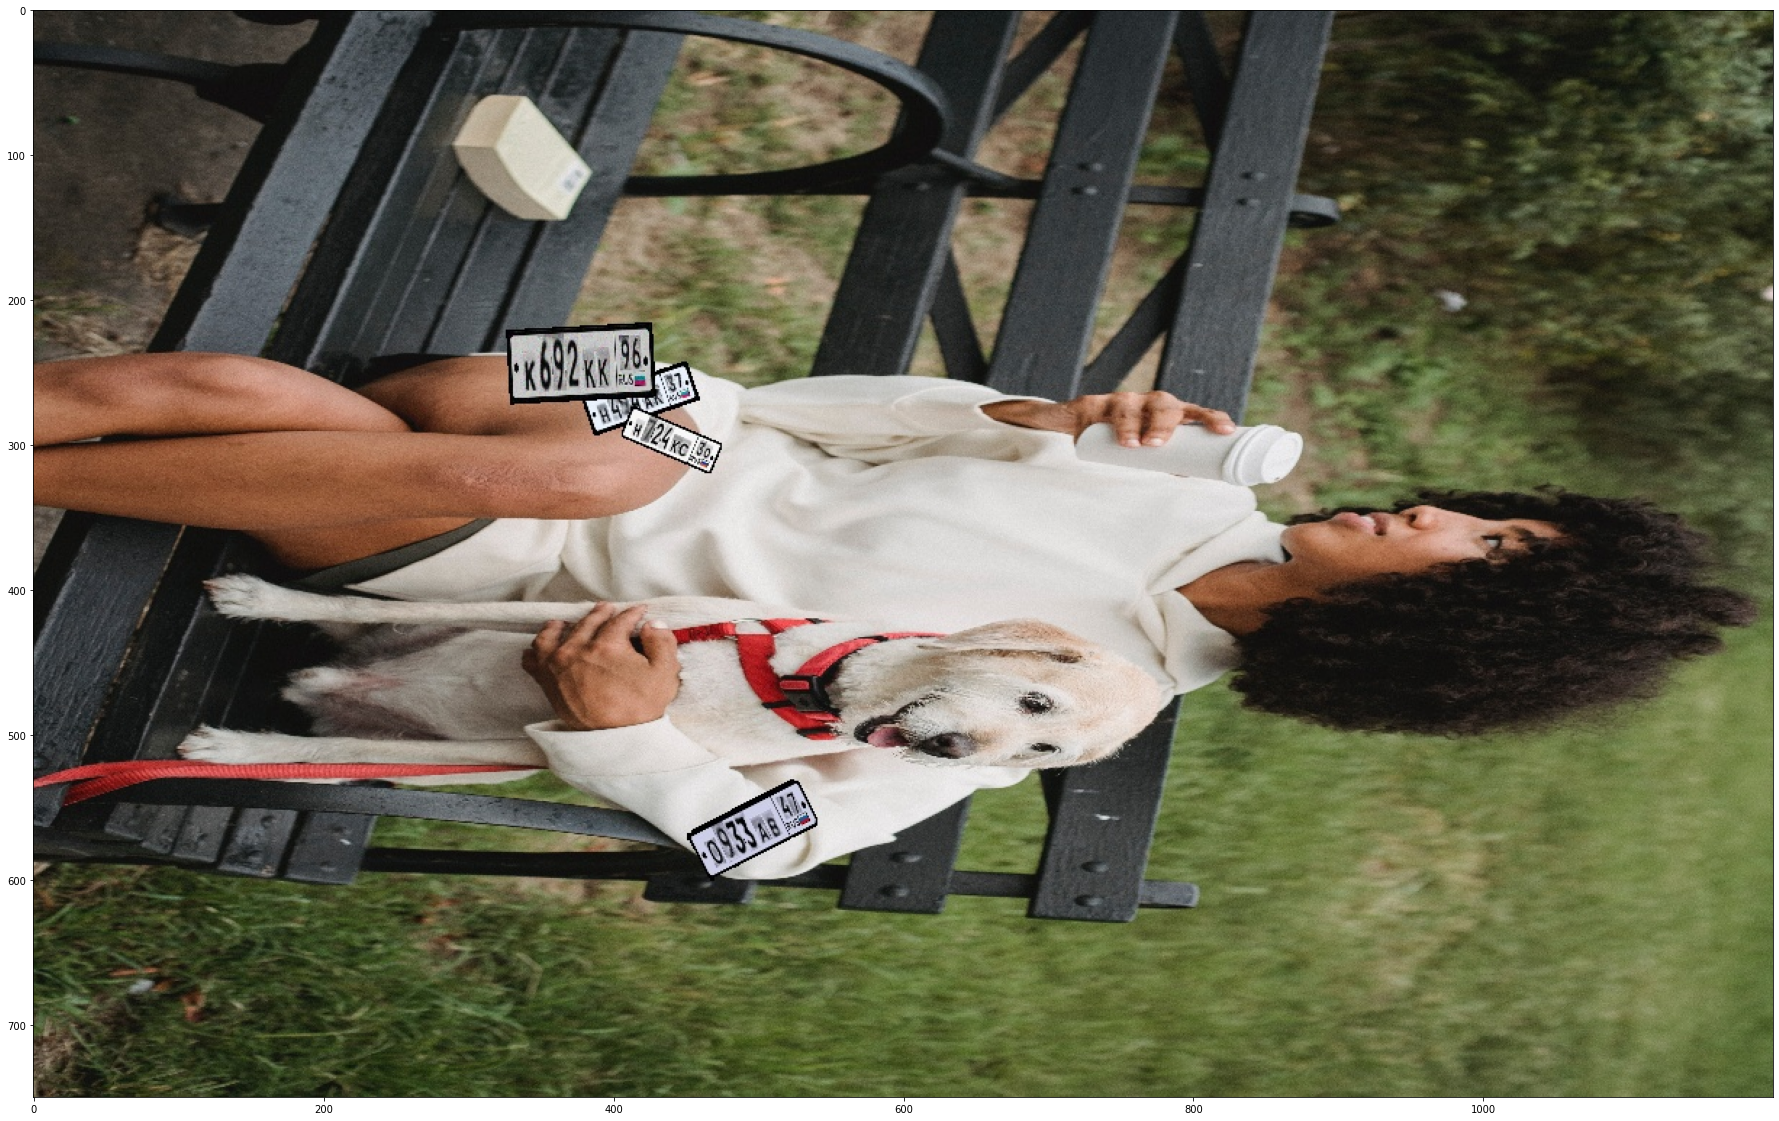

In [80]:
visualize(cv2.imread(os.path.join('data', 'train', 'image_0_0.JPG'), cv2.IMREAD_UNCHANGED))